# Плотное векторное представление слов для определения тональности текста отзывов на фильмы из IMDb (Internet Movie Database) 

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

In [248]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
# работа с обратной связью от обучающейся нейронной сети
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-urfu-imdb/train.npy
/kaggle/input/dl-urfu-imdb/train_label.npy
/kaggle/input/dl-urfu-imdb/sample_supmission.csv
/kaggle/input/dl-urfu-imdb/test.npy


Загружаем данные

In [249]:
KAGGLE_PATH = '/kaggle/input/dl-urfu-imdb/'
x_train = np.load(KAGGLE_PATH + 'train.npy', allow_pickle=True)
y_train = np.load(KAGGLE_PATH + 'train_label.npy', allow_pickle=True)
x_test = np.load(KAGGLE_PATH + 'test.npy', allow_pickle=True)
x_train.shape, y_train.shape, x_test.shape, 

((46000,), (46000,), (4000,))

## Подготовка данных для обучения

In [315]:
max_words = 10_000
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

## Создание нейронной сети

In [362]:
model = Sequential()
model.add(Embedding(max_words, 256, input_length=maxlen))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [363]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
#adagrad
#adam  sgd rmsprop

## Обучаем нейронную сеть

In [364]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=16,
                    validation_split=0.1)

Epoch 1/10
2588/2588 [==============================] - 26s 10ms/step - loss: 0.5125 - accuracy: 0.7246 - val_loss: 0.3268 - val_accuracy: 0.8554
Epoch 2/10
2588/2588 [==============================] - 25s 10ms/step - loss: 0.2396 - accuracy: 0.9031 - val_loss: 0.3420 - val_accuracy: 0.8537
Epoch 3/10
2588/2588 [==============================] - 26s 10ms/step - loss: 0.1397 - accuracy: 0.9503 - val_loss: 0.3824 - val_accuracy: 0.8504
Epoch 4/10
2588/2588 [==============================] - 26s 10ms/step - loss: 0.0692 - accuracy: 0.9788 - val_loss: 0.4481 - val_accuracy: 0.8404
Epoch 5/10
2588/2588 [==============================] - 26s 10ms/step - loss: 0.0342 - accuracy: 0.9905 - val_loss: 0.5117 - val_accuracy: 0.8354
Epoch 6/10
2588/2588 [==============================] - 26s 10ms/step - loss: 0.0192 - accuracy: 0.9949 - val_loss: 0.5761 - val_accuracy: 0.8293
Epoch 7/10
2588/2588 [==============================] - 26s 10ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.6416 -

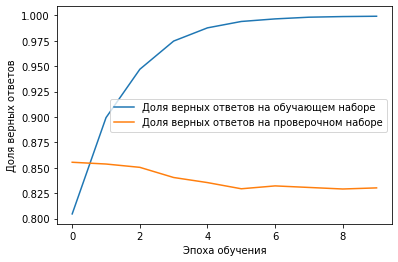

In [365]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Готовим данные для LeaderBoard

In [366]:
sample_submission = pd.read_csv(KAGGLE_PATH + 'sample_supmission.csv', index_col='id')
sample_submission.label = model.predict_classes(x_test)
sample_submission.to_csv("sample_submission.csv")